In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as Cosmology
from astropy import units as u 
from astropy import constants as const
from astropy.coordinates import SkyCoord
#from ipynb.fs.full.Dataframe_GOALS import *
from analytic_neutrino_flux import *
from Diffuse_IceCube.diffuse_IceCube_plot import *

import math
from IPython.display import display
import pandas as pd

In [2]:
df = pd.read_csv('GOALS_dataframe/dataframe')

In [3]:
supernova_rate = df['Supernova rate [yr$^{-1}$] '].to_numpy('float')
uncorr_supernova_rate = df['un-corr Supernova rate [yr$^{-1}$] '].to_numpy('float')
luminosity_distance = df['D_L [Mpc]'].to_numpy('float')

In [4]:
def diffuse_flux_prediction(Erange,sn,lumd,gammasn):
    nism = 1000
    R = 250
    H = 150
    v = 500
    plow = 0.001
    pup = 1e9 
    pmax = 1e8
    diffuse_flux = 0
    diffuse_flux_array = []
    for k in Erange:
        for i,j in zip(sn,lumd):
            diffuse_flux += Flux(k, R,v,nism,H, gammasn, pmax , i, j )
        diffuse_flux_array += [diffuse_flux]    
        diffuse_flux = 0
    return np.array(diffuse_flux_array)/(4*np.pi)



In [5]:
Energy_range = np.logspace(np.log10(1.5e4),np.log10(5e6),12)


In [6]:
diffuse_flux_gamma5 = diffuse_flux_prediction(Energy_range, supernova_rate,luminosity_distance, 4.5)


In [7]:
diffuse_flux_gamma5_noAGN = diffuse_flux_prediction(Energy_range, uncorr_supernova_rate,luminosity_distance, 4.5)


In [8]:
diffuse_flux_gamma25 = diffuse_flux_prediction(Energy_range, supernova_rate, luminosity_distance, 4.25)


In [9]:
diffuse_flux_gamma25_noAGN = diffuse_flux_prediction(Energy_range, uncorr_supernova_rate,luminosity_distance, 4.25)

In [10]:
diffuse_flux_gamma2 = diffuse_flux_prediction(Energy_range,supernova_rate, luminosity_distance, 4)

In [11]:
diffuse_flux_gamma2_noAGN = diffuse_flux_prediction(Energy_range, uncorr_supernova_rate,luminosity_distance, 4)

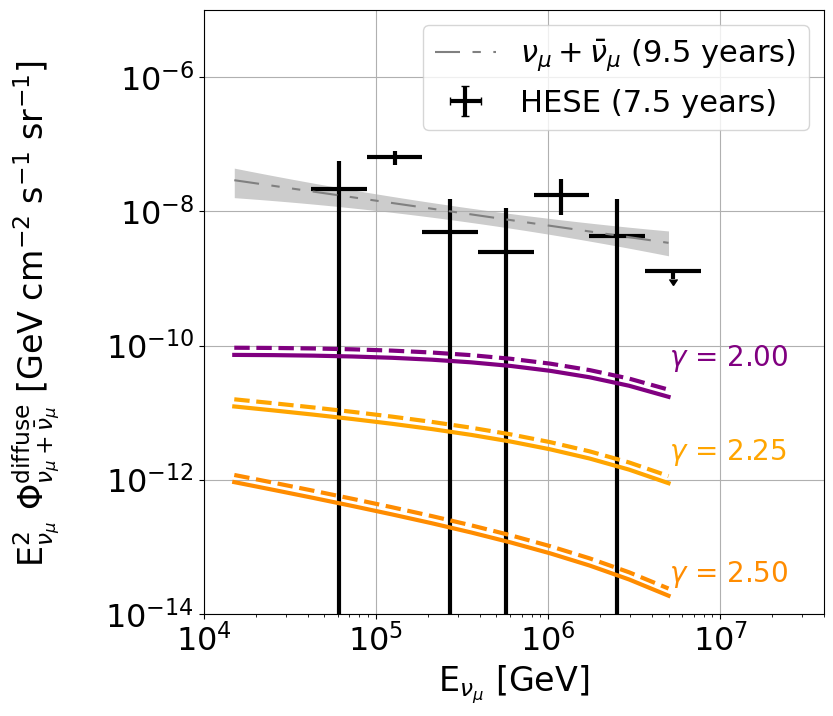

In [12]:
# Plot the HESE data up to index i
i = len(energy)
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
Energy_plot = np.logspace(np.log10(1.5e4),np.log10(5e6),12)

plt.plot(Energy_plot,diffuse_flux_gamma2_noAGN,color = 'purple',linestyle = '--',linewidth = 3)
plt.plot(Energy_plot,diffuse_flux_gamma2,color = 'purple', linewidth = 3)

plt.plot(Energy_plot,diffuse_flux_gamma25_noAGN, color = 'orange', linestyle = '--', linewidth = 3)
plt.plot(Energy_plot,diffuse_flux_gamma25, color = 'orange', linewidth = 3)

plt.plot(Energy_plot,diffuse_flux_gamma5_noAGN, color = 'darkorange',linestyle= '--', linewidth = 3)
plt.plot(Energy_plot,diffuse_flux_gamma5, color = 'darkorange', linewidth = 3)




HESE = plt.errorbar(energy[:i],
                   flux[:i],
                   xerr=[energy_lower_err[:i],energy_upper_err[:i]],
                   yerr=[flux_lower_err[:i],flux_upper_err[:i]],
                   uplims=upper_limits[:i],
                   marker="o",
                   markersize=0,
                   color="k",
                   linestyle="none",
                   linewidth=3,
                   capsize=0, label = 'HESE (7.5 years)')

plt.text(5e6,5e-11, s = '$\\gamma$ = 2.00', fontsize = 20,color = 'purple')
plt.text(5e6,2e-12, s = '$\\gamma$ = 2.25', fontsize = 20,color = 'orange')
plt.text(5e6,3e-14, s = '$\\gamma$ = 2.50', fontsize = 20,color = 'darkorange')

en = np.arange(1e4,5e6,100)

# Plot the diffuse nu_mu best fit
plt.xscale('log')
plt.yscale('log')
numu_best = plt.plot(energy_range_numu,
                    flux_numu*energy_range_numu**2,
                    color="grey",
                    linestyle=(0,(12,6,4,6,4,6)), label= '$\\nu_\\mu + \\bar{\\nu}_{\\mu}$ (9.5 years)') # dashdotdotted

# Plot the error band of the diffuse nu_mu best fit



numu_err = plt.fill_between(energy_numu,
                           flux_lower,
                           flux_upper,
                           color="grey",
                           lw=0,
                           alpha=0.4)


plt.ylim(1e-14,1e-5)
plt.xlim(1e4,4e7)
plt.xlabel ("E$_{\\nu_\\mu}$ [GeV]", fontsize = 24)
plt.ylabel('E$_{\\nu_{\\mu}}^2$ $\\Phi ^{\\mathrm{diffuse}}_{\\nu_\\mu + \\bar{\\nu}_{\\mu}}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] \n', fontsize = 24)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 22)
plt.grid()
plt.savefig("./Figures/diffuseGOALS.pdf",bbox_inches="tight")


# Sanity checks

In [13]:
print("Diffuse flux prediction computed with flux generator function: \n \n ",diffuse_flux_gamma2)
print(" ")
print("Diffuse flux prediction straight from dataframe: ", np.sum(df['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'])/(4*np.pi))

Diffuse flux prediction computed with flux generator function: 
 
  [7.24719804e-11 7.19061690e-11 7.06723867e-11 6.86315961e-11
 6.56285671e-11 6.15138966e-11 5.61839010e-11 4.96322848e-11
 4.20079903e-11 3.36623488e-11 2.51571130e-11 1.72011322e-11]
 
Diffuse flux prediction straight from dataframe:  6.871912555350311e-11
